# UMPC-Food101 Dataset Analysis

In [1]:
import pandas as pd
import  os
import numpy as np
from os import listdir
from PIL import Image
import itertools
from UMPC_Dataset import UMPC_FoodDataset

In [6]:
root_dir="./datasets/Food101"
txt_folder=root_dir+"/texts"
img_folder=root_dir+"/images"

## 1. Exploring and Prepross Current CSV

In [30]:
train=pd.read_csv(txt_folder+"/train.csv")
test=pd.read_csv(txt_folder+"/test.csv")
test

,Unnamed: 0,image_path,text,food
0,0,apple_pie_175.jpg,My Apple Pie Recipe,apple_pie
1,1,apple_pie_107.jpg,Casa de Luna Creations: Apple Pie from Scratch,apple_pie
2,2,apple_pie_554.jpg,Vegan Smoothies: Recipe for Apple Pie Smoothie,apple_pie
3,3,apple_pie_445.jpg,Dessert Recipes #8 - My Honeys Place,apple_pie
4,4,apple_pie_12.jpg,How to Bake An Organic Apple PieSimple Daily R...,apple_pie
...,...,...,...,...
22711,22711,waffles_49.jpg,Classic Waffles Recipe | Basic Belgian Style W...,waffles
22712,22712,waffles_75.jpg,Toasty Pumpkin Waffles Recipe | Taste of Home,waffles
22713,22713,waffles_320.jpg,Sourdough Waffles&nbsp;|&nbsp;'],waffles
22714,22714,waffles_17.jpg,Waffles Recipes - Pham Fatale,waffles


### 2. Remove first redundant Column `"Unnamed: 0"` and save new csv

In [32]:
train=train.drop("Unnamed: 0",axis=1)
test= test.drop("Unnamed: 0",axis=1)

In [33]:
train.to_csv(txt_folder+"/train_new.csv",index=False)
test.to_csv(txt_folder+"/test_new.csv",index=False)

### 3. Remove (.txt) and replace it with (.jpg) in mis-named image paths and save new csv

In [35]:
def prepross_Csv(target):
    csv_file=txt_folder+target+"_new.csv"
    image_path=[]
    text=[]
    label=[]
    with open (csv_file,"r") as file:
        for i,row in enumerate(file):
            if i>=1: #exclude Header
                img_path,txt,lbl=row.split(",")
                lbl=lbl.replace("\n", "")
                img_path=img_path.replace("txt","jpg")
                image_path.append(img_path)
                text.append(txt)
                label.append(lbl)

    dictionary={"Image_path":image_path,'text':text,'label':label}
    df_dictionary=pd.DataFrame(dictionary)
    df_dictionary.to_csv(f"./datasets/Food101/texts/{target}_V2.csv",index=False)

target1="/train"
target2="/test"
prepross_Csv(target1)
prepross_Csv(target2)

In [7]:
train=pd.read_csv(txt_folder+"/train_V2.csv")
train

,Image_path,text,label
0,apple_pie_851.jpg,Crock-Pot Ladies Crock-Pot Apple Pie Moonshine,apple_pie
1,apple_pie_140.jpg,Mom's Maple-Apple Pie Recipe | Taste of Home,apple_pie
2,apple_pie_858.jpg,Cookin&#8217; Canuck &#8211; Baked Apple Pie E...,apple_pie
3,apple_pie_449.jpg,Dutch Apple Pie Recipe | Just A Pinch Recipes,apple_pie
4,apple_pie_695.jpg,Our Share of the Harvest &raquo; Grandma&#8217...,apple_pie
...,...,...,...
67983,waffles_198.jpg,Honey Pumpkin Waffles Recipe | Friends Drift I...,waffles
67984,waffles_760.jpg,Awfully Good Waffles RecipesFavorite Food Reci...,waffles
67985,waffles_621.jpg,Breakfast Recipes - GOODEness Gracious,waffles
67986,waffles_639.jpg,Isabel&#39;s Coconut Waffles | Recipes | Beyo...,waffles


In [13]:
test=pd.read_csv(txt_folder+"/test_V2.csv")
test

,Image_path,text,label
0,apple_pie_175.jpg,My Apple Pie Recipe,apple_pie
1,apple_pie_107.jpg,Casa de Luna Creations: Apple Pie from Scratch,apple_pie
2,apple_pie_554.jpg,Vegan Smoothies: Recipe for Apple Pie Smoothie,apple_pie
3,apple_pie_445.jpg,Dessert Recipes #8 - My Honeys Place,apple_pie
4,apple_pie_12.jpg,How to Bake An Organic Apple PieSimple Daily R...,apple_pie
...,...,...,...
22711,waffles_49.jpg,Classic Waffles Recipe | Basic Belgian Style W...,waffles
22712,waffles_75.jpg,Toasty Pumpkin Waffles Recipe | Taste of Home,waffles
22713,waffles_320.jpg,Sourdough Waffles&nbsp;|&nbsp;'],waffles
22714,waffles_17.jpg,Waffles Recipes - Pham Fatale,waffles


## 2. UMPC Food Dataset Class

## 2.1 Train set with mode="all" (image+text)

In [2]:
trainset=UMPC_FoodDataset(targ_dir="./datasets/Food101" ,phase="train", transform=None)

In [3]:
print(len(trainset))
trainset[0]

67988


(<PIL.Image.Image image mode=RGB size=400x293 at 0x7F6FE7868400>,
 {'input_ids': tensor([  101, 13675,  7432,  1011,  8962,  6456, 13675,  7432,  1011,  8962,
           6207, 11345, 23377, 14014,   102,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
  'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
 'Crock-Pot Ladies  Crock-Pot Apple Pie Moonshine',
 0)

In [40]:
trainset.classes[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [41]:
dict(itertools.islice(trainset.class_to_idx.items(), 10))

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9}

In [42]:
dict(itertools.islice(trainset.idx_to_class.items(), 10))

{0: 'apple_pie',
 1: 'baby_back_ribs',
 2: 'baklava',
 3: 'beef_carpaccio',
 4: 'beef_tartare',
 5: 'beet_salad',
 6: 'beignets',
 7: 'bibimbap',
 8: 'bread_pudding',
 9: 'breakfast_burrito'}

## 2.2 Test set with mode="text only" 

In [38]:
testset=UMPC_FoodDataset(targ_dir="./datasets/Food101" ,phase="test", mode="Text_only",transform=None)
print(len(testset))
testset[0]

22716


({'input_ids': tensor([  101,  2026,  6207, 11345, 17974,   102,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
  'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'attention_mask': tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
 'My Apple Pie Recipe',
 0)

In [45]:
txt_token,txt,lbl=testset[0]
idx_to_class[lbl]

'apple_pie'

## 3. Classes Distribution

In [8]:
#Train Set
ClassesTrain=train["label"].value_counts().sort_values()
ClassesTrain

lobster_bisque         591
escargots              603
hot_and_sour_soup      608
fish_and_chips         624
poutine                630
                      ... 
ravioli                705
risotto                708
sushi                  710
french_toast           711
macaroni_and_cheese    713
Name: label, Length: 101, dtype: int64

<AxesSubplot: >

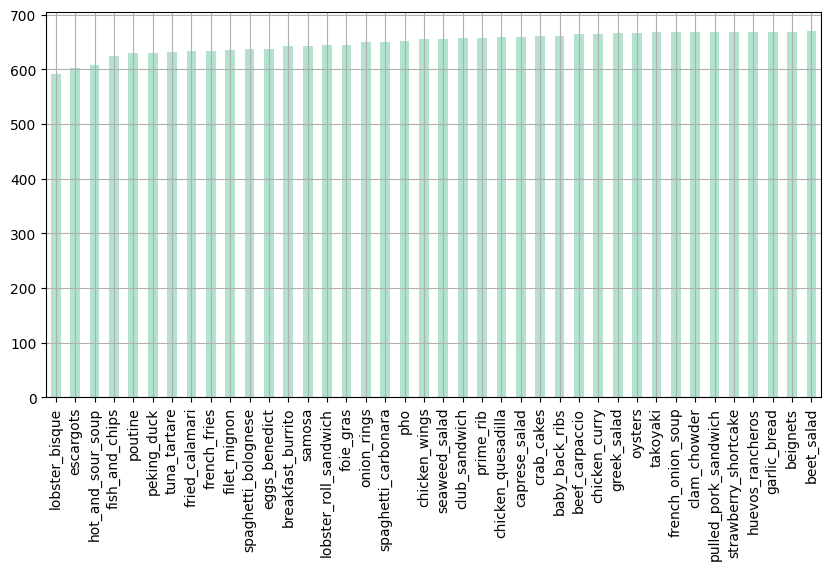

In [12]:
ClassesTrain[:40].plot(kind='bar',figsize=(10,5),colormap="Pastel2",grid=True)

In [14]:
#Test Set
ClassesTest=test["label"].value_counts().sort_values()
ClassesTest

lobster_bisque         197
escargots              202
hot_and_sour_soup      203
fish_and_chips         208
poutine                210
                      ... 
ravioli                236
risotto                236
sushi                  237
macaroni_and_cheese    238
french_toast           238
Name: label, Length: 101, dtype: int64

<AxesSubplot: >

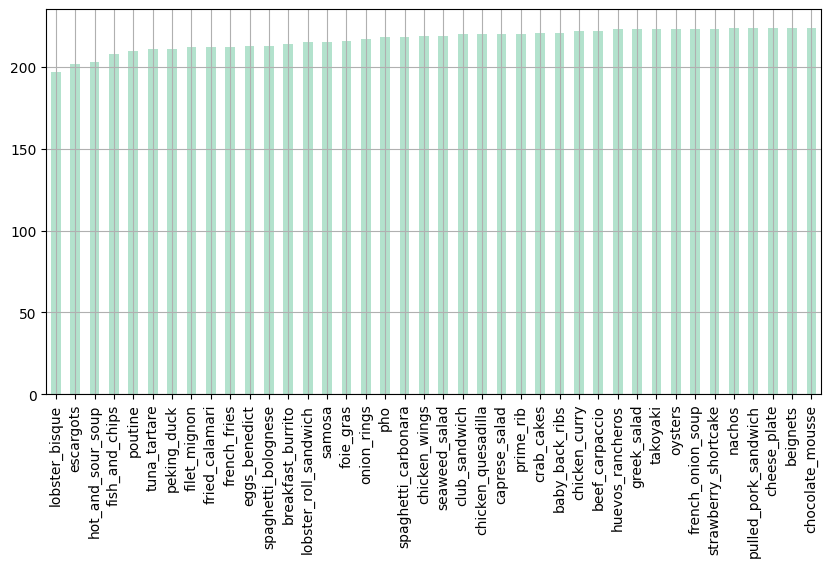

In [16]:
ClassesTest[:40].plot(kind='bar',figsize=(10,5),colormap="Pastel2",grid=True)

## 4. Check if there is a missing or corrupted files 

#### Check for empty image path

In [17]:
# creating bool series True for NaN values
bool_series = pd.isnull(train["Image_path"])
 
# filtering data
# displaying data only with team = NaN
train[bool_series]

,Image_path,text,label


#### Check if an image path doesnt exist

In [27]:
doesnt_exist=[]
with open ("./datasets/Food101/texts/train_V2.csv","r") as file:
    for i,row in enumerate(file):
        if i>=1: #exclude Header
            #print(i)
            img_path,txt,lbl=row.split(",")
            lbl=lbl.replace("\n","")
            isExist = os.path.exists(f'./datasets/Food101/images/train/{lbl}/{img_path}')
            #print()
            if not isExist:
                doesnt_exist.append(img_path)
print(len(doesnt_exist) ) 

0


#### Check if there is an corrupted image

In [ ]:
from os import listdir
from PIL import Image

with open ("./datasets/Food101/texts/train_V2.csv","r") as file:
    for i,row in enumerate(file):
        if i>=1: #exclude Header
            img_path,txt,lbl=row.split(",")
            lbl=lbl.replace("\n","")
            try:
                img = Image.open(f'./datasets/Food101/images/train/{lbl}/{img_path}') # open the image file
                img.verify() # verify that it is, in fact an image
            except:
                print('Bad file:', filename) # print out the names of corrupt files
                